# Проект: Анализ оттока клиентов

**Цель проекта:**

- Анализ клиентов регионального банка и выделение сегментов клиентов, которые склонны уходить из банка. С целью удержания Клиентов

**Заказчик:**

- Отдел маркетинга банка

# План проекта:

1. [**Загрузка и предобработка данных:**](#1.-Загрузка-и-предобработка-данных:)    
   1.1. [Загрузка библиотек](#1.1-Загрузка-библиотек)  
   1.2. [Загрузка данных](#1.2-Загрузка-данных)  
   1.3. [Проверка данных на пропуски](#1.3.-Проверка-данных-на-пропуски)  
   1.4. [Проверка данных на дубликаты](#1.4-Проверка-данных-на-дубликаты)  
   1.5. [Кодирование столбцов "gender" и "city"](#1.5-Кодирование-столбцов-"gender"-и-"city")  
2. [**Анализ данных:**](#2.-Анализ-данных:)  
    2.1. [Сравнение портретов Клиентов (средние и медианы)](#2.1-Сравнение-портретов-Клиентов-(средние-и-медианы))  
    2.2. [Анализ распределения характеристик в разрезе оттока.](#2.2-Анализ-распределения-характеристик-в-разрезе-оттока.)  
    2.3. [Степень зависимости оттока.](#2.3-Степень-зависимости-оттока.)  
3. [**Проверка статистических гепотез:**](#3.-Проверка-статистических-гепотез:)  
    3.1 [Различия дохода между теми клиентами, которые ушли и теми, которые остались.](#3.1-Различия-дохода-между-теми-клиентами,-которые-ушли-и-теми,-которые-остались.)  
    3.2 [Различия в возрасте между теми клиентами, которые ушли и теми, которые остались.](#3.2-Различия-в-возрасте-между-теми-клиентами,-которые-ушли-и-теми,-которые-остались.)
4. [**Промежуточные выводы**](#4.-Промежуточные-выводы)  
5. [**Определение сегментов**](#5.-Определение-сегментов)  
    5.1. [Распределение Клиентов на сегменты.](#5.1-Распределение-Клиентов-на-сегменты.)  
    5.2. [Определение наиболее важных сегментов.](#5.2-Определение-наиболее-важных-сегментов.)
6. [**Выводы и рекомендации**](#6.-Выводы-и-рекомендации)

**Описание данных** <a id='columns'></a>

- `userid` — идентификатор пользователя ,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity`  — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта (1-есть, 0-нет),
- `last_activity` — активный клиент (1-активный, 0-нет),
- `est_salary` — заработная плата клиента,
- `churn` — ушёл или нет (1-уходит, 0-нет).

## 1. Загрузка и предобработка данных:

### 1.1 Загрузка библиотек  


In [190]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns 
from numpy import median
from scipy import stats as st


import warnings
warnings.filterwarnings('ignore')

In [191]:
pip list

Package                       Version
----------------------------- ---------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat        

Note: you may need to restart the kernel to use updated packages.


### 1.2 Загрузка данных  


In [192]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [193]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Сразу приведем все столбцы датафрейма в нижний регистр.

In [194]:
df.columns = df.columns.str.lower()
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### 1.3 Проверка данных на пропуски  


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Большое количество пропусков в столбце с балансом. Отобразим на графике все пропуски.

In [196]:
# напишем функцию для графика отображения кол-ва пропусков в %
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5,
                  legend = False, fontsize = 16, xlabel='название столбца', ylabel='% пропусков')
            .set_title('Количество пропусков в %', fontsize = 22, color = 'SteelBlue')
        );    
    except:
        print('пропусков не осталось :) ')

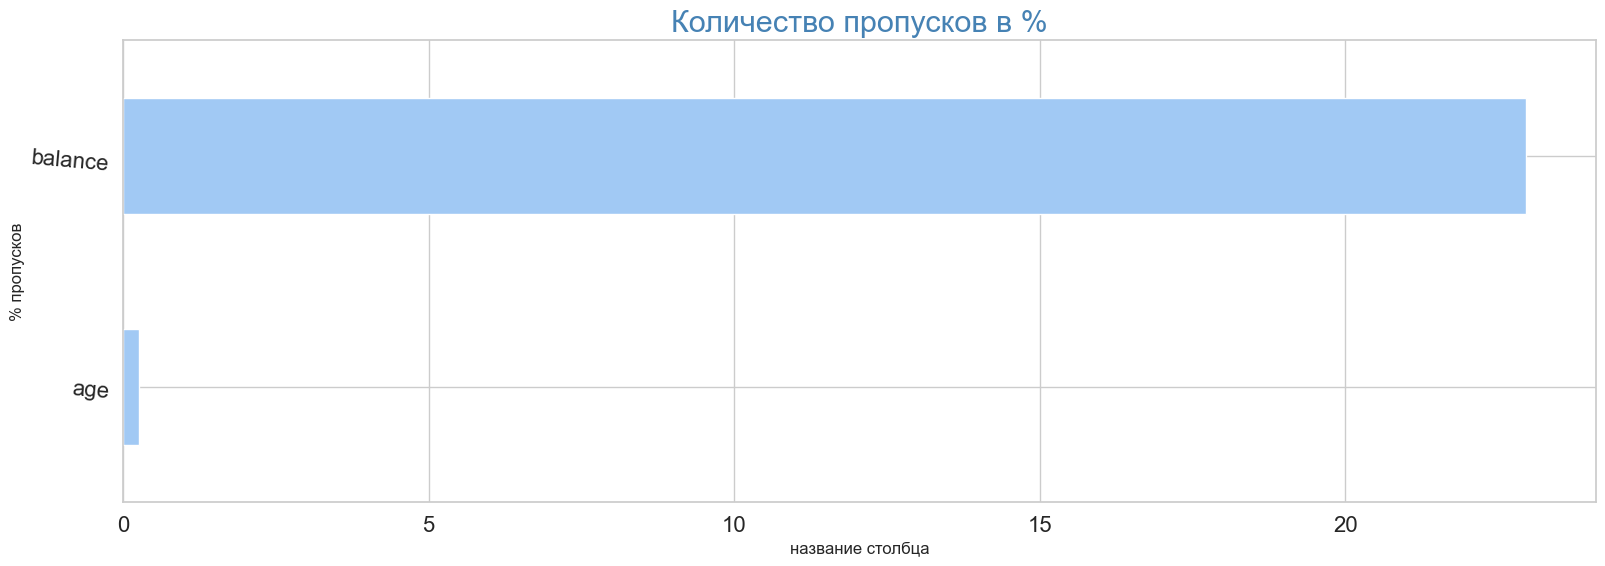

In [197]:
pass_value_barh(df)

 
- По столбцу Age не представляется возможным заполнить пропуски, возможно по данным строкам будут важные для нас значения по остальным столбцам. В любом случае, такое количество пропуском сильно не исказит результаты анализа относительно столбца с возрастом. Оставим как есть.  
- По столбцу balance приблизительно 25% значений пропущено. Посмотрим влияние данного столбца на другие (построим матрицу корреляции) и как сильно он нам интересен в отношении задачи (значимость относительно столбца churn)

In [198]:
balance_gaps = df.groupby(df['balance'].isnull()).mean().T
balance_gaps.columns=['gaps_false', 'gaps_true']
balance_gaps['persent'] = balance_gaps['gaps_true'] / balance_gaps['gaps_false'] * 100
balance_gaps

,gaps_false,gaps_true,persent
userid,171738.837508,172069.447930,100.192508
score,843.739260,865.352070,102.561551
age,42.924366,42.093023,98.063237
equity,3.395068,0.050980,1.501601
balance,827794.306510,NaN,NaN
products,2.080986,1.162092,55.843302
credit_card,0.640104,0.815686,127.430307
last_activity,0.515769,0.549455,106.531288
est_salary,124501.872366,226310.208654,181.772534
churn,0.234523,0.005664,2.415323


- Меньше 1% из пропущенных значений являются отточными Клиентами. Проверим дополнительно ниже.
- Ощутимая разница между пропущенными и не пропущенными значениями по отношению к столбцам products b salary. Проверим зависимость между ними по матрице корреляции.

Запишем новый столбец, в котором пропуски - 0, и имеющиеся данные - 1.

In [199]:
df['balance_NaN'] = np.where(df['balance'].isnull(), 0,1)
df['balance_NaN'].value_counts()

1    7705
0    2295
Name: balance_NaN, dtype: int64

Сгруппируем по новому столбцу и посмотрим процент отточных\не отточных Клиентов по данным.

In [200]:
df.groupby(['balance_NaN'])['churn'].value_counts(normalize=True)

balance_NaN  churn
0            0        0.994336
             1        0.005664
1            0        0.765477
             1        0.234523
Name: churn, dtype: float64

- Как и описывали выше - >99% пропусков относятся к активным пользователям. В плане исследования отточных они нам не так интересны, но данные надо заполнить, так как при анализе существенно исказятся данные в отношении активных пользователей.  
- Посмотрим на характер пропусков

In [201]:
#кросстаблица по городам
pd.crosstab(df['city'], df['balance_NaN'])

balance_NaN,0,1
city,,
Ростов,235,1182
Рыбинск,593,2102
Ярославль,1467,4421


Больше всего пропусков в Ярославле, но они так же есть и в других городах. Идея о сбое в конкретном городе не подходит.

In [202]:
# Кросстаблица по оценке собственности
pd.crosstab(df['equity'], df['balance_NaN'])

balance_NaN,0,1
equity,,
0,2180,412
1,114,660
2,0,1052
3,1,1542
4,0,1850
5,0,1918
6,0,161
7,0,80
8,0,17


Большинство пропусков не имеет оценки собственности.

In [203]:
# по продукту
pd.crosstab(df['products'], df['balance_NaN'])

balance_NaN,0,1
products,,
0,1,0
1,1950,1391
2,315,4811
3,29,1010
4,0,474
5,0,19


У большинства 1 продукт. 

In [204]:
#наличие кредитных карт
pd.crosstab(df['credit_card'], df['balance_NaN'])

balance_NaN,0,1
credit_card,,
0,423,2773
1,1872,4932


Большинство клиентов с пропусками в балансе имеют кредитные карты

Построим матрицу корреляции

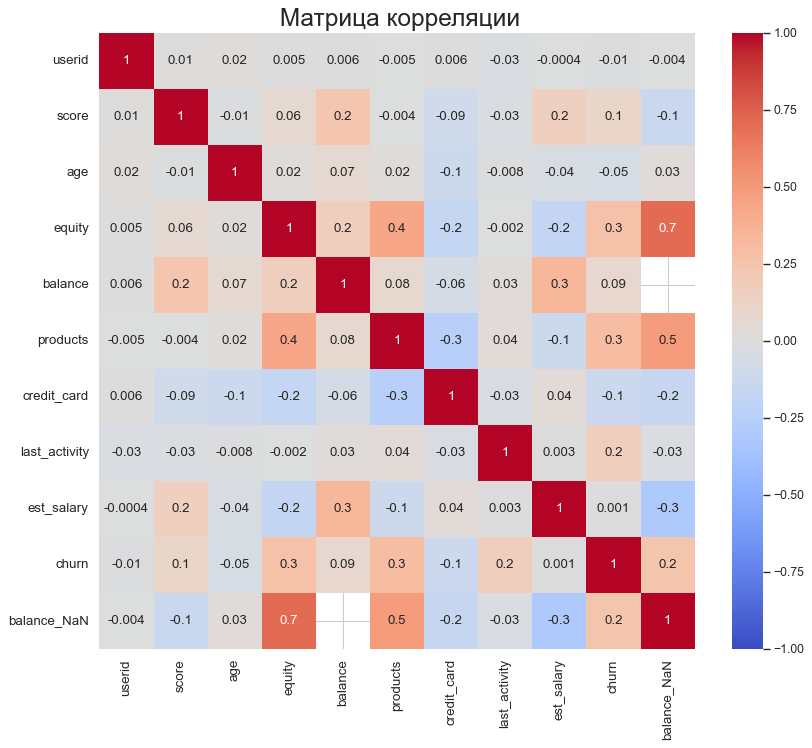

In [205]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns,
            yticklabels=df.corr().columns, 
            cmap='coolwarm', center=0, annot=True, vmin=-1, vmax=1, fmt='.1g')

# Decorations
plt.title(' Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Выводы:**

- Пропуски типа MNAR
- Больше всего у пропущенных значений зависимость с оценкой собственности и количеством продуктов, так же мы знаем, что у большинства есть кредитные карты. + они не отточные. 
- Возможно пропуски связаны с задолженностями по кредитным картам.
- потерять данные мы не можем. Считаю, что данные можно заполнить средними значениями по категориям столбцов equity и product. Так как корреляция относительно столбца credit_card отрицательная, но большинство имеют 1 продукт и полагаю, это и есть кредитные карты.

In [206]:
old_balance = df.balance.copy()

df['balance'].isna().mean()

0.2295

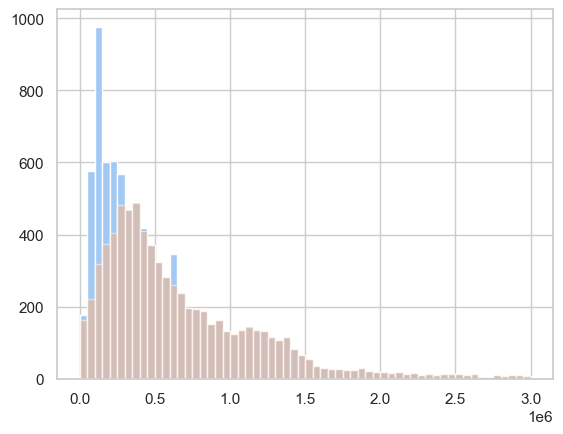

In [207]:
maxval, step = 3e6, 5e4
bins=np.arange(0,maxval+step,step)

median_groups = df.assign(
        est_salary = df.est_salary.round(-4)
    ).groupby(['equity', 'products','est_salary'])['balance'].transform('median')
new_balance = df['balance'].fillna(median_groups)

new_balance.hist(bins=bins)
old_balance.hist(bins=bins,alpha=.5);

In [208]:
df['balance'].isna().sum()

2295

In [209]:
df['balance'] = df['balance'].fillna(median_groups)

In [210]:
df['balance'].isna().mean()

0.065

### 1.4 Проверка данных на дубликаты  


Проверить на дубликаты можно только userid, 

In [211]:
df.nunique()

userid           9927
score             348
city                3
gender              2
age                68
equity             10
balance          7737
products            6
credit_card         2
last_activity       2
est_salary       9996
churn               2
balance_NaN         2
dtype: int64

In [212]:
df[df.duplicated(['userid','city'])]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_NaN


In [213]:
df[df.duplicated(['userid'])]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_NaN
1583,190253,726.0,Ярославль,М,49.0,0,125512.405,1,1,1,177700.78,0,0
1837,210662,896.0,Рыбинск,Ж,37.0,0,141870.110,2,0,0,90916.04,0,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.650,3,0,0,103867.47,0,1
2165,187635,692.0,Рыбинск,Ж,NaN,0,625364.685,1,1,1,160368.82,0,0
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.390,3,1,0,95606.80,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.070,2,0,1,79963.59,0,1
9785,168998,895.0,Рыбинск,М,44.0,0,282653.530,3,0,0,255296.47,0,1
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.160,2,0,1,59651.35,0,1
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.140,2,1,0,53099.16,0,1


In [214]:
df.query('userid == 190253')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_NaN
231,190253,823.0,Рыбинск,М,37.0,4,373348.390,2,0,1,131947.92,1,1
1583,190253,726.0,Ярославль,М,49.0,0,125512.405,1,1,1,177700.78,0,0


Есть дубликаты userid, но их не много и id по разным городам. Оставим как есть

### 1.5 Кодирование столбцов "gender" и "city"

In [215]:
df['city_out'] = df['city']
df['gender_out'] = df['gender']
df= pd.get_dummies(df, columns=["gender_out", "city_out"], prefix=["gender", "city"])
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_NaN,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,187996.20,1,1,1,107683.34,0,0,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,1,0,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,0,1,0,0,1


## 2. Анализ данных:  

### 2.1 Сравнение портретов Клиентов (средние и медианы)

In [248]:
portrait_df = df.columns.drop(['userid', 'gender', 'city', 'balance_NaN', 'churn'])

In [217]:
for i in portrait_df:
    table = (
    df.groupby('churn')
    .agg({'userid':'nunique', i:['mean', 'median']})
    .reset_index()
    .sort_values(by='churn', ascending=False)
)
    print('Сравнение портрета по столбцу', i)
    display(table)

Сравнение портрета по столбцу score


churn  userid       score       
        nunique        mean median
1     1    1820  863.401099  866.0
0     0    8157  845.428362  848.0

Сравнение портрета по столбцу age


churn  userid        age       
        nunique       mean median
1     1    1820  41.450247   39.0
0     0    8157  43.020846   40.0

Сравнение портрета по столбцу equity


churn  userid    equity       
        nunique      mean median
1     1    1820  3.763736    4.0
0     0    8157  2.374817    3.0

Сравнение портрета по столбцу balance


churn  userid       balance           
        nunique          mean     median
1     1    1820  1.132238e+06  780435.06
0     0    8157  6.118322e+05  371485.29

Сравнение портрета по столбцу products


churn  userid  products       
        nunique      mean median
1     1    1820  2.375824    2.0
0     0    8157  1.757579    2.0

Сравнение портрета по столбцу credit_card


churn  userid credit_card       
        nunique        mean median
1     1    1820    0.551099    1.0
0     0    8157    0.709169    1.0

Сравнение портрета по столбцу last_activity


churn  userid last_activity       
        nunique          mean median
1     1    1820      0.702198    1.0
0     0    8157      0.483741    0.0

Сравнение портрета по столбцу est_salary


churn  userid     est_salary            
        nunique           mean      median
1     1    1820  148243.010198  125390.620
0     0    8157  147783.200108  118257.715

Сравнение портрета по столбцу gender_Ж


churn  userid  gender_Ж       
        nunique      mean median
1     1    1820  0.350000    0.0
0     0    8157  0.532763    1.0

Сравнение портрета по столбцу gender_М


churn  userid  gender_М       
        nunique      mean median
1     1    1820  0.650000    1.0
0     0    8157  0.467237    0.0

Сравнение портрета по столбцу city_Ростов


churn  userid city_Ростов       
        nunique        mean median
1     1    1820    0.146154    0.0
0     0    8157    0.140709    0.0

Сравнение портрета по столбцу city_Рыбинск


churn  userid city_Рыбинск       
        nunique         mean median
1     1    1820     0.240110    0.0
0     0    8157     0.276039    0.0

Сравнение портрета по столбцу city_Ярославль


churn  userid city_Ярославль       
        nunique           mean median
1     1    1820       0.613736    1.0
0     0    8157       0.583252    1.0

### Выводы

1. **score — баллы кредитного скоринга**
    - Средний балл кредитного скорринга отточных - 863/ не отточных 845
2. **city — город** 
    - Больших различий отточных и не отточных Клиентов по каждому городу нет, но в совокупности больше всего отточных в Ярославле(61%), ровно как и не отточных (58). Это связано с большим количеством Клиентов в данном городе.
3. **gender — пол**  
    - По Полу более отточными являются мужчины 65% на 35%.
4. **age — возраст**
    - Средний возраст отточных Клиентов - 41(39 медианное значение)/ не отточных - 43(40 медианное значение)
5. **equity — количество баллов собственности**  
    - отточные клиенты имеют больше баллов собственности (4) чем не отточные (3)
6. **balance — баланс на счёте**  
    - Медианный баланс отточных - 775 тыс. руб/ не отточных 321 тыс руб. При Этом среднее значение у не отточных больше, что говорит о выбросах (крупные Клиенты, хорошо, что они не собираются уходить)
7. **products — количество продуктов, которыми пользуется клиент**  
    - Продукт по медианным показателям различий нет по 2 продукта у обеих групп.
8. **credit_card — наличие кредитной карты** 
    - Наличие кредитных карт в среднем больше у не отточных (70%), 55% отточных Клиентов имеют кредитную карту.
9. **last_activity — активность**
    - 70% отточных Клиентов - Активные. У не отточных этот показатель меньше (48%)
10. **est_salary — зарплата плата клиента**
    - Медианные показатели зарплаты больше у отточных Клиентов

### 2.2 Анализ распределения характеристик в разрезе оттока.

In [218]:
sns.set_theme(style='whitegrid', palette='pastel')

In [219]:
def level_churn_graf(data, column):
    churn_graf = data.groupby(column)['churn'].value_counts(normalize=True).to_frame()
    churn_graf.columns=['percent']
    churn_graf['cnt'] = df.groupby(column)['churn'].value_counts()
    churn_graf = churn_graf.reset_index().sort_values(by='churn', ascending=False)
    churn_graf['percent'] = round(churn_graf['percent'] * 100, 2)
    
    plt.figure(figsize=(10,6))
    ax = sns.barplot(churn_graf, x=column, y='percent', hue='churn', palette='blend:#7AB,#EDA')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.axhline(y=data['churn'].mean() * 100, color='green') 
    plt.title(f'Распределение характеристики {column} в разрезе оттока')
    plt.ylabel('процент клиентов')
    plt.show()
    
    return

#### Распределение по городам в разрезе оттока

[описание столбцов](#columns)

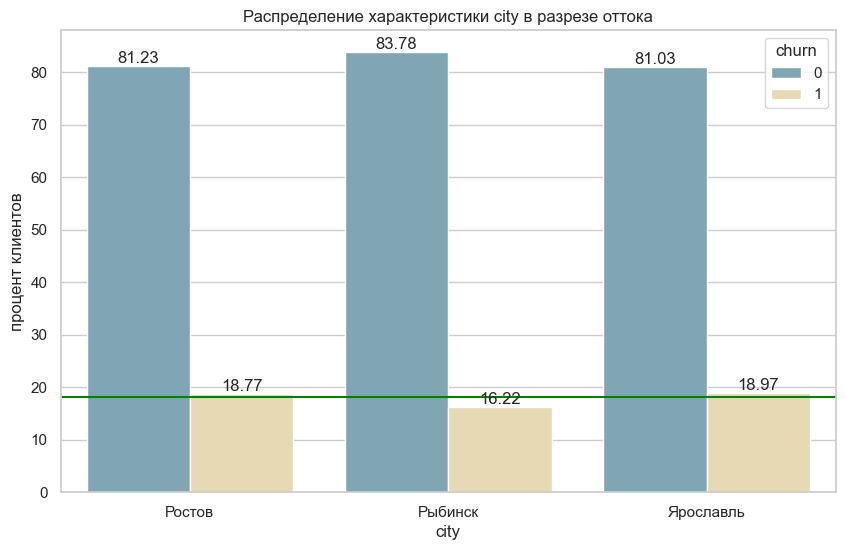

In [220]:
level_churn_graf(df, 'city')

Уровень оттока в разрезе городов не превышает средний показатель по банку. Ростов (18,77%), Рыбинск (16,22%), Ярославль (18,97%)

#### Распределение по полу в разрезе оттока

[описание столбцов](#columns)

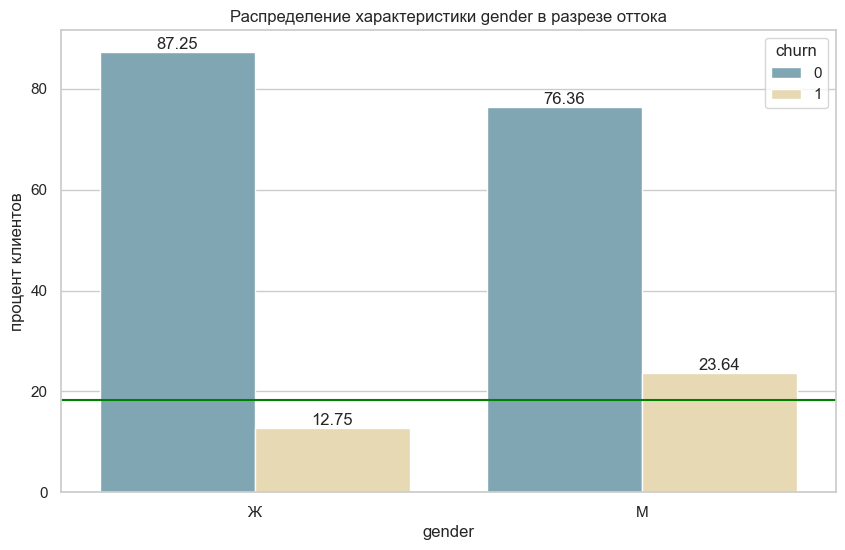

In [221]:
level_churn_graf(df, 'gender')

Уровень оттока Мужчин превышает средний уровень оттока по банку ~ на 5%.

#### Распределение по возрасту в разрезе оттока

[описание столбцов](#columns)

In [222]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.query('churn == 1')['age'], histnorm='probability density', name='отточные'))
fig.add_trace(go.Histogram(x=df.query('churn == 0')['age'], histnorm='probability density', name='лояльные'))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)

По возрасту можно выделить 2 группы отточных Клиентов это Клиенты от 25 до 35 лет и Клиенты от 50 до 60 лет.

#### Распределение по количеству баллов собственности в разрезе оттока 

[описание столбцов](#columns)

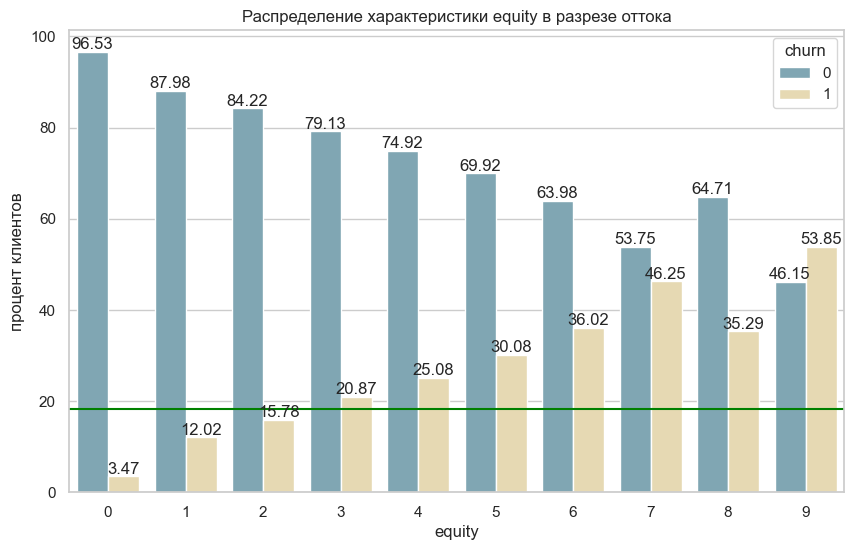

In [223]:
level_churn_graf(df,'equity')

Клиенты с кол-м баллов собственности от 0 до 3 - не превышают уровень оттока по банку. В целом можно утверждать, что: чем больше балл собственности у Клиента, тем выше уровень оттока. Но группы Клиентов с баллам 6 и 8 особо не отличаются по оттоку. Больше всего отточных Клиентов имеют балл собственности - 9

#### Распределение по продукту в разрезе оттока 

[описание столбцов](#columns)

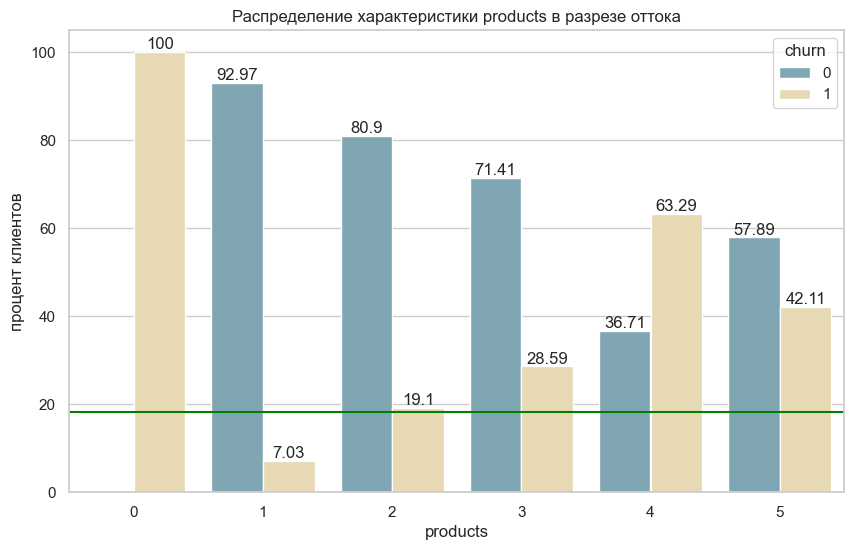

In [224]:
level_churn_graf(df, 'products')

100% отток у Клиентов не имеющих ни 1 продукта (Всего 1 Клиент). (Возможно просто Клиенты, которые подавали заявки на продукт, но их не устроили условия). Больше всего отточных Клиентов, которые имеют 4 продукта, также отток выше среднего у Клиентов с 5-ю и 3-мя продуктами.

In [225]:
df = df.query('products != 0')

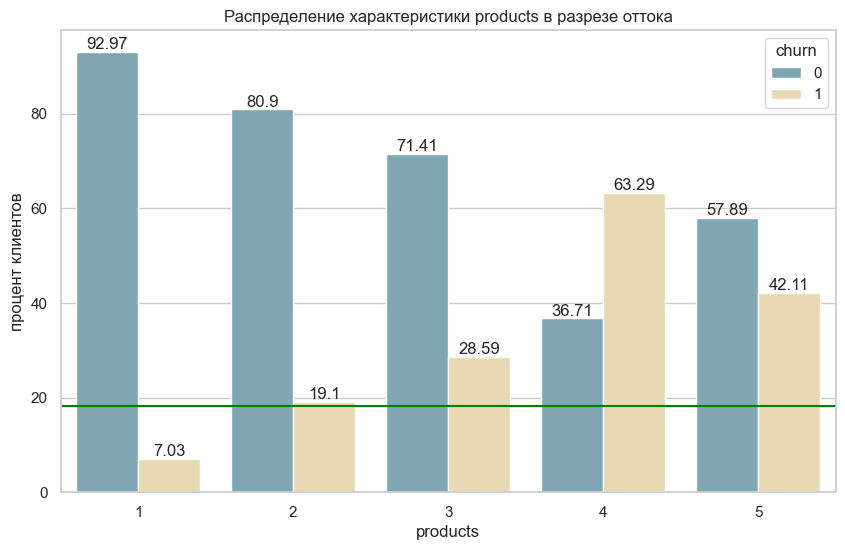

In [226]:
level_churn_graf(df, 'products')

#### Распределение по наличию кредитных карт в разрезе оттока 

[описание столбцов](#columns)

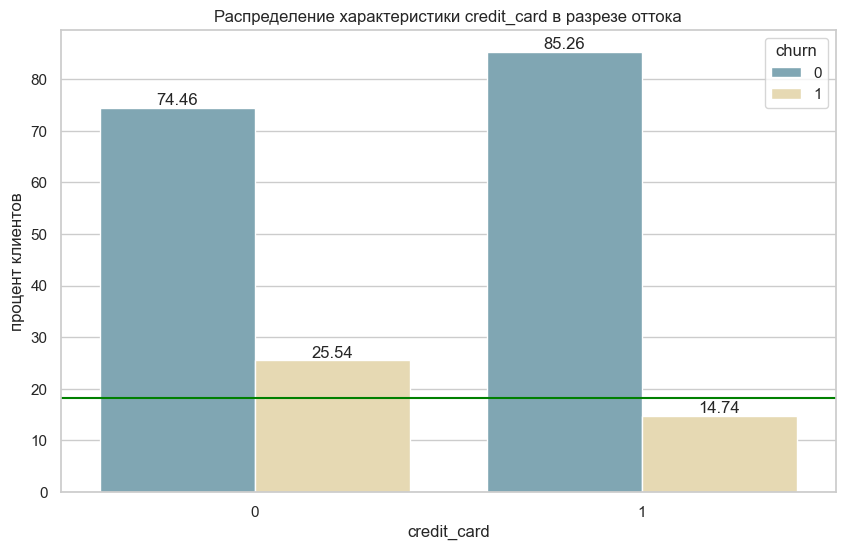

In [227]:
level_churn_graf(df, 'credit_card')

У Клиентов не имеющих кредитных карт уровень оттока выше среднего по банку ~ на 7 %. Уровень оттока Клиентов, имеющих кредитные карты ниже среднего оттока по банку. Можго сделать вывод, что условия по кредитным картам приемлимы

#### Распределение по активности Клиента в разрезе оттока

[описание столбцов](#columns)

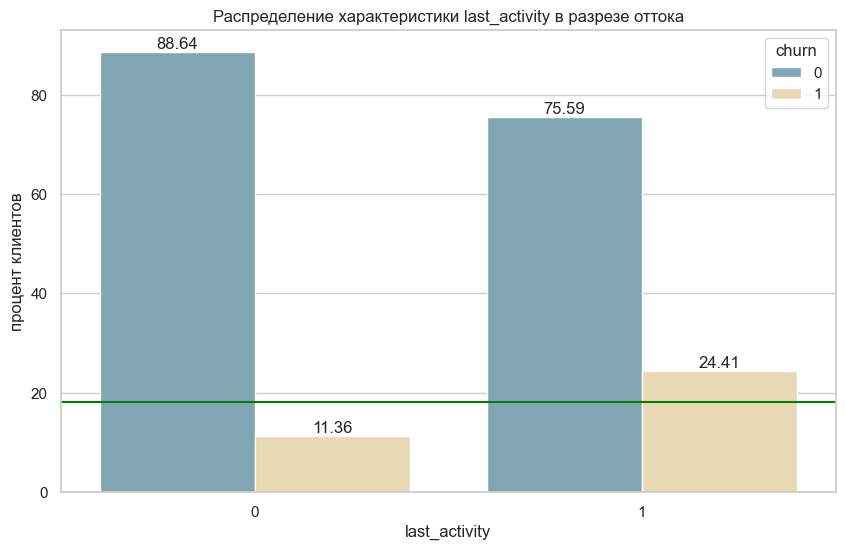

In [228]:
level_churn_graf(df, 'last_activity')

У Активных Клиентов уровень оттока выше среднего оттока по банку ~ на 6%

#### Распределение по балансу в разрезе оттока

In [229]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.query('churn == 1')['balance'], histnorm='probability density', name='отточные'))
fig.add_trace(go.Histogram(x=df.query('churn == 0')['balance'], histnorm='probability density', name='лояльные'))
fig.update_layout(barmode='overlay')
fig.update_xaxes(range=(0, 4000000))
fig.update_traces(opacity=0.5)

По Балансу более отточными являются Клиенты в промежутке 750 тыс. руб. - 2,25 млн. руб.

#### Распределение по заработной плате Клиента в разрезе оттока

[описание столбцов](#columns)

In [230]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.query('churn == 1')['est_salary'], histnorm='probability density', name='отточные'))
fig.add_trace(go.Histogram(x=df.query('churn == 0')['est_salary'], histnorm='probability density', name='лояльные'))
fig.update_layout(barmode='overlay')
fig.update_xaxes(range=(0, 600000))
fig.update_traces(opacity=0.5)

По критерию зарплаты более отточными являются Клиенты с зарплатой от 100 до 220 тыс. руб.

#### Распределение по баллам кредитного скоринга в разрезе оттока

[описание столбцов](#columns)

In [231]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.query('churn == 1')['score'],
                           histnorm='probability density', name='отточные'))
fig.add_trace(go.Histogram(x=df.query('churn == 0')['score'], histnorm='probability density', name='лояльные'))
fig.update_layout(barmode='overlay')
fig.update_xaxes(range=(600, 1050))
fig.update_traces(opacity=0.5)

Более отточными являются Клиенты с баллом скоринга в диапазоне от 820 до 900

### 2.3 Степень зависимости оттока.

In [232]:
col_list = df.columns.tolist()
col_list

['userid',
 'score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn',
 'balance_NaN',
 'gender_Ж',
 'gender_М',
 'city_Ростов',
 'city_Рыбинск',
 'city_Ярославль']

In [233]:
df_corr = df.corr().drop(['userid','balance_NaN'])

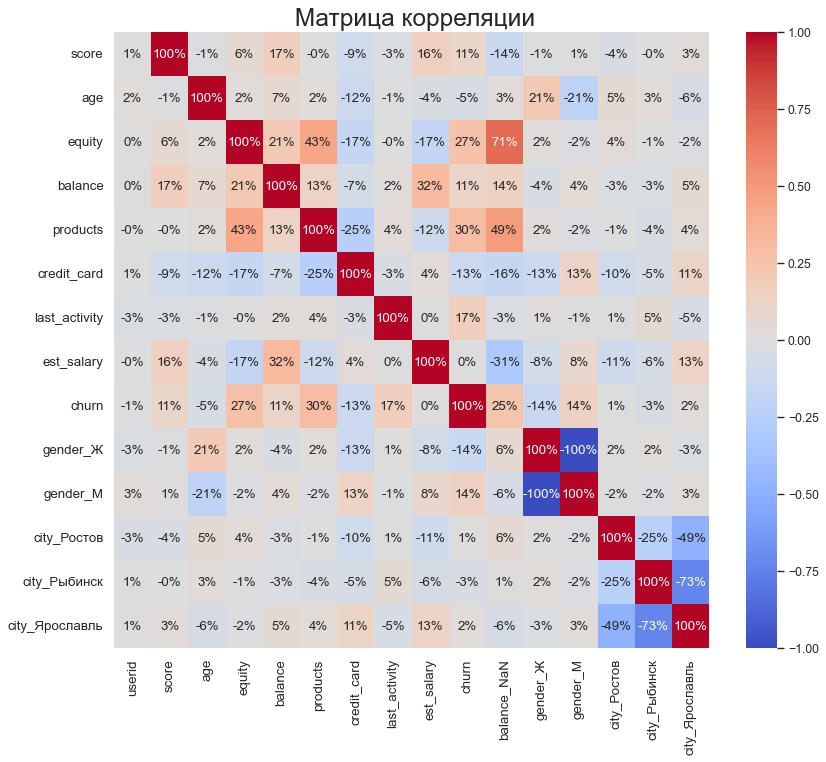

In [234]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, fmt='.0%')

# Decorations
plt.title(' Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

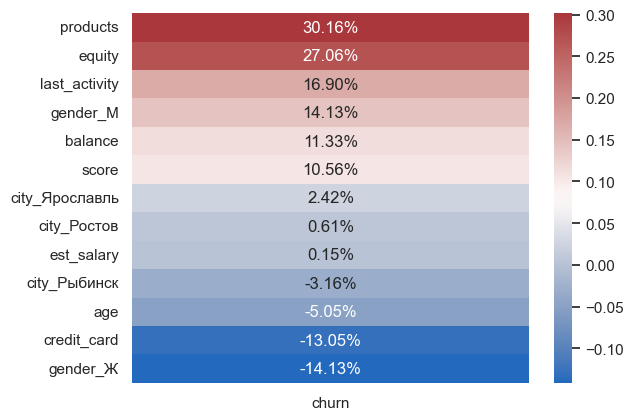

In [235]:
sns.heatmap(df_corr.loc[:,['churn']].drop('churn').sort_values(by='churn', ascending=False), annot=True,
            cmap='vlag', fmt='.2%');

**Выводы**  

Матрица корреляции показала, что больше всего на отток влияет 5 категорий (зависимость больше 10%):  
1. Количество продуктов - (30.10%) 
2. Количество баллов собственности - (27.06%)
3. Активность - (16.88%)
4. Пол, а именно Мужской пол - (14.10%)
5. Баллы скоринга - (10.60%)


## 3. Проверка статистических гепотез:  


### 3.1 Различия дохода между теми клиентами, которые ушли и теми, которые остались.

Выбор метода теста:  
- Критерий дохода имеет большое количество значений  
- Выборки по churn распределены не равномерно (1820 отточных и 8157 не отточных), следовательно мы будем проводить тест на проверку гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (t-test) 

1. Главное условие, которое должно быть соблюдено для применения t-testa - Генеральные совокупности не должны зависеть друг от друга.
- Они не зависят друг от друга, так как они противоположны.
2. Дисперсии рассматриваемых генеральных совокупностей должны быть равны.
- мы не знаем, равны ли дисперсии, поэтому установим параметр equal_var=False.

```
- H_0: Доход отточных Клиентов (balance, churn == 1)  = Доход не отточных Клиентов (balance, churn == 0)
- H_a: Доход отточных Клиентов (balance, churn == 1) ≠ Доход не отточных Клиентов (balance, churn == 0)
alpha = 0.05
```

In [236]:
results = st.ttest_ind(
    df[df['churn'] == 1]['est_salary'],
    df[df['churn'] == 0]['est_salary'],
    equal_var=False
)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу. Доход отточных Клиентов не равен доходу не отточных')
else:
    print('Не получилось отвергнуть нулевую гипотезую')

0.8724727072323815
Отвергаем нулевую гипотезу. Доход отточных Клиентов не равен доходу не отточных


In [237]:
# results = вызов метода для проверки гипотезы
results = st.mannwhitneyu(
    df[df['churn'] == 1]['est_salary'],
    df[df['churn'] == 0]['est_salary'])
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Доход отточных Клиентов не равен доходу не отточных')
else:
    print('Не получилось отвергнуть нулевую гипотезую')

0.00021160652203623057
Отвергаем нулевую гипотезу. Доход отточных Клиентов не равен доходу не отточных


Между методам есть значительная разница.

Почему возникла разница:
- U-критерий Манна-Уитни используется для сравнения различий между двумя независимыми выборками, когда распределение выборки не является нормальным, а размеры выборки малы (n < 30).
- Все дело в выборке, она у нас большая. Чем больше данных попадает в выборку, тем точнее получаем результат. Поэтому лучше использовать ttest.

### 3.2 Различия в возрасте между теми клиентами, которые ушли и теми, которые остались.

```
- H_0: Возраст отточных Клиентов (age, churn == 1)  = Возраст не отточных Клиентов (age, churn == 0)
- H_a: Возраст отточных Клиентов (age, churn == 1) ≠ Возраст не отточных Клиентов (age, churn == 0)
alpha = 0.05
```

In [238]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df[df['churn'] == 1]['score'],
    df[df['churn'] == 0]['score'],
    equal_var=False
)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8436753008142297e-37
Не получилось отвергнуть нулевую гипотезу


## 4. Промежуточные выводы

**Анализ оттока по баллам кредитного скоринга**  
1. **Сравнение портретов** показало, что: средний балл кредитного скорринга отточных - 863 / не отточных 845.  
2. **Распределение в разрезе оттока:** Более отточными являются Клиенты с баллом скоринга в диапазоне от 820 до 900.  
3. **Зависимость между оттоком и данной категорией:** 10,60%
**Анализ оттока по Городам**  
1. **Сравнение портретов** показало, что: больших различий отточных и не отточных Клиентов по каждому городу нет, но в совокупности больше всего отточных в Ярославле(61%), ровно как и не отточных (58). Это связано с большим количеством Клиентов в данном городе.  
2. **Распределение в разрезе оттока:** Уровень оттока в разрезе городов не превышает средний показатель по банку.  
- Ростов (18,77%)  
- Рыбинск (16,22%)  
- Ярославль (18,97%).  
3. **Зависимость между оттоком и данной категорией:**  
- Ярославль - 2,39%  
- Ростов - 0,60%  
- Рыбинск - -3,12%  

**Анализ оттока по полу**  
1. **Сравнение портретов** показало: что более отточными являются мужчины 65% на 35%.  
2.  **Распределение в разрезе оттока:**Уровень оттока Мужчин превышает средний уровень оттока по банку ~ на 5%.  
3. **Зависимость между оттоком и данной категорией:**  
- М - 14,10%  
- Ж - -14,10%  

**Анализ оттока по возрасту**  
1. **Сравнение портретов** показало: средний возраст отточных Клиентов - 41(39 медианное значение)/ не отточных - 43(40 медианное значение).  
2.  **Распределение в разрезе оттока:**По возрасту можно выделить 2 группы отточных Клиентов это Клиенты от 25 до 35 лет и Клиенты от 50 до 60 лет.  
3. **Зависимость между оттоком и данной категорией:** -4,98%
**Анализ оттока по количеству баллов собственности**  
1. **Сравнение портретов** показало: что отточные клиенты имеют больше баллов собственности (4) чем не отточные (3).  
2.  **Распределение в разрезе оттока:** Клиенты с кол-м баллов собственности от 0 до 3 - не превышают уровень оттока по банку. В целом можно утверждать, что: чем больше балл собственности у Клиента, тем выше уровень оттока. Но группы Клиентов с баллам 6 и 8 особо не отличаются по оттоку. Больше всего отточных Клиентов имеют балл собственности - 9.  
3. **Зависимость между оттоком и данной категорией:** 27,06%
**Анализ оттока по Балансу** 
1. **Сравнение портретов** показало: что Медианные значения баланса отточных - 775 тыс. руб/ не отточных 321 тыс руб. При Этом среднее значение у не отточных больше, что говорит о выбросах (крупные Клиенты).  
2. **Распределение в разрезе оттока:** По Балансу более отточными являются Клиенты в промежутке 750 тыс. руб. - 2,25 млн. руб. 
3. **Зависимость между оттоком и данной категорией:** 8,56%
**Анализ оттока по количеству продуктов**  
1. **Сравнение портретов** показало: что различий нет. По 2 продукта у обеих групп.  
2. **Распределение в разрезе оттока:** 100% отток у Клиентов не имеющих ни 1 продукта (Всего 1 Клиент). (Возможно просто Клиенты, которые подавали заявки на продукт, но их не устроили условия). Больше всего отточных Клиентов, которые имеют 4 продукта, также отток выше среднего у Клиентов с 5-ю и 3-мя продуктами.  
3. **Зависимость между оттоком и данной категорией:** 30,10%
**Анализ оттока по наличию кредитных карт** 
1. **Сравнение портретов** показало, что: наличие кредитных карт в среднем больше у не отточных (70%), 55% отточных Клиентов имеют кредитную карту.  
2. **Распределение в разрезе оттока:** У Клиентов не имеющих кредитных карт уровень оттока выше среднего по банку ~ на 7 %. Уровень оттока Клиентов, имеющих кредитные карты ниже среднего оттока по банку. Можго сделать вывод, что условия по кредитным картам приемлимы.  
3. **Зависимость между оттоком и данной категорией:** - 13,08%
**Анализ оттока по активности клиентов**  
1. **Сравнение портретов** показало, что: 70% отточных Клиентов - Активные. У не отточных этот показатель меньше (48%)  
2. **Распределение в разрезе оттока:** У Активных Клиентов уровень оттока выше среднего оттока по банку ~ на 6%.  
3. **Зависимость между оттоком и данной категорией:** 16,88%
**Анализ оттока по доходу клиента** 
1. **Сравнение портретов** показало, что: медианные показатели зарплаты больше у отточных Клиентов  
2. **Распределение в разрезе оттока:** По критерию зарплаты более отточными являются Клиенты с зарплатой от 100 до 220 тыс. руб.  
3. **Зависимость между оттоком и данной категорией:** 0,13%  


В сегментации будем рассматривать Клиентов:
- Мужчин
- Количество баллов собственности >= 5
- Продукт >= 2
- Возраст в диапазоне от 50 до 60 и от 25 до 35
- Наличие кредитных карт - 0
- Баллы скоринга в диапазоне 820 - 900
- Активность - 1
- Баланс в диапазоне 750 т.р. - 2,25 млн.р.

## 5. Определение сегментов


Напишем функцию, которая будет передавать в формулу условия для формирования сегмента

In [239]:
def segments (condition):
    display(df.query(condition).agg({"churn":["mean","sum","count"]}))
    return

### Распределение Клиентов на сегменты.  


In [240]:
segments('gender == "М" and equity >= 4 and products >= 2')

,churn
mean,0.399882
sum,679.000000
count,1698.000000


 - Мужчины имеющие больше 4 баллов собственности имеют 40% оттока. В зависимости от типа собственности можно предложить страхование имущества на приятных условиях.

In [241]:
segments('products >=2 and  50 <= age <= 60')

,churn
mean,0.330677
sum,415.000000
count,1255.000000


- 33% отточных Клиентов в группе из 1255 человек - Клиенты от 50 до 60 лет имеющие больше 2 продуктов.  
- Предположим это кредит, кредитная карта. В таком случае можно предложить рефинансирование кредитных продуктов.

In [242]:
segments('products >=2 and gender == "М"')

,churn
mean,0.316448
sum,1012.000000
count,3198.000000


In [243]:
segments('last_activity == 1 and 820 <= score <= 900 and credit_card == 0')

,churn
mean,0.455063
sum,400.000000
count,879.000000


- 45% отточных Клиентов в группе из 879 человек. 
- Можно предложить кредитные карты с лимитом, соответствующим кредитному скору.
- Что бы карты были привлекательнее сделать промо на безпроцентное снятие наличных или уквеличенный безпроцентный период.

In [244]:
segments('last_activity == 1 and 750000 <= balance <= 2250000')

,churn
mean,0.460856
sum,571.000000
count,1239.000000


- 46% процентов оттока (571 человек из 1236) - Активные Клиенты с балансом от 750 тыс до 2,25 млн. руб. являются отточными.  
- Можно запустить промо на повышенный % на вклады за какой-то период.

In [245]:
segments('750000 <= balance <= 2250000 and equity >= 5')

,churn
mean,0.369981
sum,387.000000
count,1046.000000


In [246]:
segments('last_activity == 1 and 750000 <= balance <= 2250000 and 25<= age <=35')

,churn
mean,0.664474
sum,202.000000
count,304.000000


Отток 66%, группа не большая, но очень отточная

### Определение наиболее важных сегментов.

1. Наиболее отточный сегмент, который удалось обнаружить: Активные Клиенты от 25 до 35 лет с балансом от 750 т.р. до 2,25 млн. р. Ценные Клиенты, с хорошим балансом.
- Можно запустить рекламу на вклады с хорошей доходностью
2. Сегмент: Активные Клиенты, не имеющие кредитных карт, и с баллом скоринга в диапазоне 820 - 900
- 45% отточных Клиентов в группе из 879 человек. 
- Можно предложить кредитные карты с лимитом, соответствующим кредитному скору.
- Что бы карты были привлекательнее сделать промо на безпроцентное снятие наличных или уквеличенный безпроцентный период.  3. 3. Сегмент: Мужчины, у которых более 2 продуктов и балл собственности >= 4
- 40% процентов оттока (679 человек из 1698)  - Мужчины имеющие больше 4 баллов собственности имеют 40% оттока. В зависимости от типа собственности можно предложить страхование имущества на приятных условиях.


In [247]:
### КОД РЕВЬЮЕРА
qrys = (
    'last_activity == 1 and 820 <= score <= 900 and credit_card == 0',
    'gender == "М" and equity >= 4 and products >= 2',
    'last_activity == 1 and 750000 <= balance <= 2250000 and 25<= age <=35'
)

df_results = pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys])

display(df_results.style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))
    
all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

if len(qrys) != 3:
    print('Результаты некорректны, нужно 3 лучших сегмента')
    
if df_results['Отток'].min() < df.churn.mean() * 1.5:
    print('Нужно изменить сегменты: присутствуют недостаточно отточные')
elif df_results['Отток'].min() < df.churn.mean() * 2:
    print('Часть сегментов недостаточно отточна')
elif df_results['Отток'].max() > df.churn.mean() * 3:
    print('Нашли очень отточный сегмент')

if df_results['Размер'].min() < 300:
    print('Нужно изменить сегменты: присутствуют слишком мелкие сегменты')
    
if all_catched.shape[0] > 5000:
    print("Отдел маркетинга не сможет обработать такое количество клиентов")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"В сегменты попало недостаточное число отточных: {text_churn}")
elif share_catched < 1/2:
    print(f"В сегменты попало: {text_churn}")
elif share_catched < 2/3:
    print(f"Хороший результат, в сегменты попало: {text_churn}")
else:
    print(f"Прекрасный результат, в сегменты попало: {text_churn}")

,Отток,Размер
last_activity == 1 and 820 <= score <= 900 and credit_card == 0,45.5%,879
"gender == ""М"" and equity >= 4 and products >= 2",40.0%,1_698
last_activity == 1 and 750000 <= balance <= 2250000 and 25<= age <=35,66.4%,304


Нашли очень отточный сегмент
Хороший результат, в сегменты попало: 1017/1819 = 55.9%


## 6. Выводы и рекомендации

**В ходе реализации проекта были сделаны следующие шаги:**  

***Обработали и подготовили данные к анализу.***
1. Перевели столбцы к нижнему регистру.  
2. Проверили данные на пропуски  
- Обнаружили дубликаты в userid (73 дубликата). Было решено оставить как есть, так как дубликаты относятся к разным Клиентам.  
- Возможно возникла техническая ошибка при консолидации базы данных или при записи данных по Клиентам в разных городах.  
Рекомендуется проверить ошибку и настроить дополнительную проверку данных перед записью в целях исключения дубликатов.
3. Проверили данные на пропуски
- По столбцу ***Age*** 26 прпоусков. Не представляется возможным заполнить пропуски, возможно по данным строкам будут важные для нас значения по остальным столбцам. В любом случае, такое количество пропуском сильно не исказит результаты анализа относительно столбца с возрастом. Оставили как есть.  
- По столбцу ***balance*** пропущено 26% значений: Пропуски типа MNAR. Больше всего у пропущенных значений зависимость с оценкой собственности и количеством продуктов, так же мы знаем, что у большинства есть кредитные карты. + они не отточные. Возможно пропуски связаны с задолженностями по кредитным картам.Потеря данных не допускается. Было принято решение заполнить данные средними значениями по категориям столбцов ***equity***, ***product*** и ***salary***. Так как корреляция относительно столбца credit_card отрицательная, но большинство имеют 1 продукт и полагаю, это и есть кредитные карты.  

***Провели анализ данных по категориям в разрезе оттока:***

**Анализ оттока по баллам кредитного скоринга**  
1. **Сравнение портретов** показало, что: средний балл кредитного скорринга отточных - 863 / не отточных 845.  
2. **Распределение в разрезе оттока:** Более отточными являются Клиенты с баллом скоринга в диапазоне от 820 до 900.  
3. **Зависимость между оттоком и данной категорией:** 10,60%
**Анализ оттока по Городам**  
1. **Сравнение портретов** показало, что: больших различий отточных и не отточных Клиентов по каждому городу нет, но в совокупности больше всего отточных в Ярославле(61%), ровно как и не отточных (58). Это связано с большим количеством Клиентов в данном городе.  
2. **Распределение в разрезе оттока:** Уровень оттока в разрезе городов не превышает средний показатель по банку.  
- Ростов (18,77%)  
- Рыбинск (16,22%)  
- Ярославль (18,97%).  
3. **Зависимость между оттоком и данной категорией:**  
- Ярославль - 2,39%  
- Ростов - 0,60%  
- Рыбинск - -3,12%  

**Анализ оттока по полу**  
1. **Сравнение портретов** показало: что более отточными являются мужчины 65% на 35%.  
2.  **Распределение в разрезе оттока:**Уровень оттока Мужчин превышает средний уровень оттока по банку ~ на 5%.  
3. **Зависимость между оттоком и данной категорией:**  
- М - 14,10%  
- Ж - -14,10%  

**Анализ оттока по возрасту**  
1. **Сравнение портретов** показало: средний возраст отточных Клиентов - 41(39 медианное значение)/ не отточных - 43(40 медианное значение).  
2.  **Распределение в разрезе оттока:**По возрасту можно выделить 2 группы отточных Клиентов это Клиенты от 25 до 35 лет и Клиенты от 50 до 60 лет.  
3. **Зависимость между оттоком и данной категорией:** -4,98%
**Анализ оттока по количеству баллов собственности**  
1. **Сравнение портретов** показало: что отточные клиенты имеют больше баллов собственности (4) чем не отточные (3).  
2.  **Распределение в разрезе оттока:** Клиенты с кол-м баллов собственности от 0 до 3 - не превышают уровень оттока по банку. В целом можно утверждать, что: чем больше балл собственности у Клиента, тем выше уровень оттока. Но группы Клиентов с баллам 6 и 8 особо не отличаются по оттоку. Больше всего отточных Клиентов имеют балл собственности - 9.  
3. **Зависимость между оттоком и данной категорией:** 27,06%
**Анализ оттока по Балансу** 
1. **Сравнение портретов** показало: что Медианные значения баланса отточных - 775 тыс. руб/ не отточных 321 тыс руб. При Этом среднее значение у не отточных больше, что говорит о выбросах (крупные Клиенты).  
2. **Распределение в разрезе оттока:** По Балансу более отточными являются Клиенты в промежутке 750 тыс. руб. - 2,25 млн. руб. 
3. **Зависимость между оттоком и данной категорией:** 8,56%
**Анализ оттока по количеству продуктов**  
1. **Сравнение портретов** показало: что различий нет. По 2 продукта у обеих групп.  
2. **Распределение в разрезе оттока:** 100% отток у Клиентов не имеющих ни 1 продукта (Всего 1 Клиент). (Возможно просто Клиенты, которые подавали заявки на продукт, но их не устроили условия). Больше всего отточных Клиентов, которые имеют 4 продукта, также отток выше среднего у Клиентов с 5-ю и 3-мя продуктами.  
3. **Зависимость между оттоком и данной категорией:** 30,10%
**Анализ оттока по наличию кредитных карт** 
1. **Сравнение портретов** показало, что: наличие кредитных карт в среднем больше у не отточных (70%), 55% отточных Клиентов имеют кредитную карту.  
2. **Распределение в разрезе оттока:** У Клиентов не имеющих кредитных карт уровень оттока выше среднего по банку ~ на 7 %. Уровень оттока Клиентов, имеющих кредитные карты ниже среднего оттока по банку. Можго сделать вывод, что условия по кредитным картам приемлимы.  
3. **Зависимость между оттоком и данной категорией:** - 13,08%
**Анализ оттока по активности клиентов**  
1. **Сравнение портретов** показало, что: 70% отточных Клиентов - Активные. У не отточных этот показатель меньше (48%)  
2. **Распределение в разрезе оттока:** У Активных Клиентов уровень оттока выше среднего оттока по банку ~ на 6%.  
3. **Зависимость между оттоком и данной категорией:** 16,88%
**Анализ оттока по доходу клиента** 
1. **Сравнение портретов** показало, что: медианные показатели зарплаты больше у отточных Клиентов  
2. **Распределение в разрезе оттока:** По критерию зарплаты более отточными являются Клиенты с зарплатой от 100 до 220 тыс. руб.  
3. **Зависимость между оттоком и данной категорией:** 0,13%  

***Проверили статистическуие гепотезы***

1. **Различия дохода между теми клиентами, которые ушли и теми, которые остались.**
2. **Различия в возрасте между теми клиентами, которые ушли и теми, которые остались.**  

***Сформировали потенциально качественные сегменты с целью уменьшения оттока клиентов и реккомендации к ним***  
1. Наиболее отточный сегмент, который удалось обнаружить: Активные Клиенты от 25 до 35 лет с балансом от 750 т.р. до 2,25 млн. р. Ценные Клиенты, с хорошим балансом.
- Можно запустить рекламу на вклады с хорошей доходностью
2. Сегмент: Активные Клиенты, не имеющие кредитных карт, и с баллом скоринга в диапазоне 820 - 900
- 45% отточных Клиентов в группе из 879 человек. 
- Можно предложить кредитные карты с лимитом, соответствующим кредитному скору.
- Что бы карты были привлекательнее сделать промо на безпроцентное снятие наличных или уквеличенный безпроцентный период.  3. 3. Сегмент: Мужчины, у которых более 2 продуктов и балл собственности >= 4
- 40% процентов оттока (679 человек из 1698)  - Мужчины имеющие больше 4 баллов собственности имеют 40% оттока. В зависимости от типа собственности можно предложить страхование имущества на приятных условиях.